In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.base import clone
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    classification_report,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from own_svm import CustomCostSVM
from sklearn.model_selection import RepeatedStratifiedKFold

Generowanie danych

In [212]:
dataset = pd.read_csv("dataset.csv")

# X, y = datasets.make_classification(
#     n_features=2,  # liczba atrybutów zbioru
#     n_samples=80,  # liczba generowanych wzorców
#     n_informative=2,  # liczba atrybutów informatywnych, tych które zawierają informacje przydatne dla klasyfikacji
#     n_repeated=0,  # liczba atrybutów powtórzonych, czyli zduplikowanych kolumn
#     n_redundant=0,  # liczba atrybutów nadmiarowych
#     flip_y=0.08,  # poziom szumu
#     random_state=100,  # ziarno losowości, pozwala na wygenerowanie dokładnie tego samego zbioru w każdym powtórzeniu
#     n_classes=2,  # liczba klas problemu
#     weights=[0.7, 0.3],
# )


X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, [2]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]


Funkcja wagi

In [213]:
def calculate_class_weights(y):
    y = np.array(y).ravel()
    class_counts = np.bincount(y)
    class_weights = (len(y) / (2 * class_counts))
    print("Obliczona waga:", {class_label: class_weights[class_label] for class_label in range(len(class_counts))}
    )
    return {class_label: class_weights[class_label] for class_label in range(len(class_counts))}


Klasyfikacja

In [214]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

clf = SVC(kernel='linear', random_state=100)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
f1_clf = f1_score(y_test, y_pred_clf)


wclf = SVC(kernel='linear', class_weight=calculate_class_weights(y_train), random_state=100)
wclf.fit(X_train, y_train)
y_pred_wclf = wclf.predict(X_test)
f1_wclf = f1_score(y_test, y_pred_wclf)

hinge_clf = SGDClassifier( loss='hinge', random_state=100)
hinge_clf.fit(X_train, y_train)
y_pred_hinge_clf = hinge_clf.predict(X_test)
f1_hinge_clf = f1_score(y_test, y_pred_hinge_clf)

squared_hinge_clf = SGDClassifier(loss='squared_hinge', random_state=100)
squared_hinge_clf.fit(X_train, y_train)
y_pred_squared_hinge_clf = squared_hinge_clf.predict(X_test)
f1_squared_hinge_clf = f1_score(y_test, y_pred_squared_hinge_clf)

# # wclf_max = SGDClassifier(loss='squared_hinge', class_weight=class_weights)
# wclf_max = SGDClassifier(loss='squared_hinge')
# wclf_max.fit(X_train, y_train)

# y_pred_wclf_max = wclf_max.predict(X_test)
# f1_wclf_max = f1_score(y_test, y_pred_wclf_max)

Obliczona waga: {0: 1.0149051490514904, 1: 0.9855263157894737}


c:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

Analiza wyników

Metryka F1:
Brak wag: 0.856
Waga z funkcji: 0.86
Waga SGD hinge loss: 0.813
Waga SGD squared hinge loss: 0.828


C:\Users\micha\AppData\Local\Temp\ipykernel_11852\611633092.py:59: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [disp.surface_.collections[0], disp_mod.surface_.collections[0], hinge_mod.surface_.collections[0], squared_hinge_mod.surface_.collections[0]],


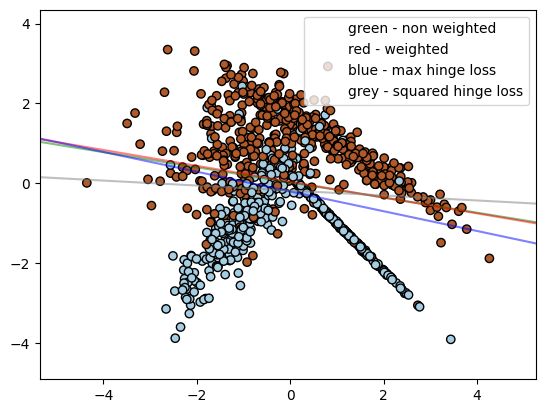

In [215]:
print("Metryka F1:")
print("Brak wag:", round(f1_clf, 3))
print("Waga z funkcji:", round(f1_wclf, 3))
print("Waga SGD hinge loss:", round(f1_hinge_clf, 3))
print("Waga SGD squared hinge loss:", round(f1_squared_hinge_clf, 3))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="green",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

disp_mod = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="red",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

hinge_mod = DecisionBoundaryDisplay.from_estimator(
    hinge_clf,
    X,
    plot_method="contour",
    colors="blue",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

squared_hinge_mod = DecisionBoundaryDisplay.from_estimator(
    squared_hinge_clf,
    X,
    plot_method="contour",
    colors="gray",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)





plt.legend(
    [disp.surface_.collections[0], disp_mod.surface_.collections[0], hinge_mod.surface_.collections[0], squared_hinge_mod.surface_.collections[0]],
    ["green - non weighted", "red - weighted", "blue - max hinge loss", "grey - squared hinge loss"],
    loc="upper right",
)

plt.show()